# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import math as math
import scipy.stats as stats
import matplotlib.pyplot as plt

# Case study - CUSTOMER ANALYSIS FOR RETAIL

# ANALYTICS IN RETAIL:
    
    With the retail market getting more and more competitive by the day, there has never been 
    anything more important than the ability for optimizing service business processes when 
    trying to satisfy the expectations of customers. Channelizing and managing data with the 
    aim of working in favor of the customer as well as generating profits is very significant for 
    survival.

    Ideally, a retailer’s customer data reflects the company’s success in reaching and nurturing 
    its customers. Retailers built reports summarizing customer behavior using metrics such as 
    conversion rate, average order value, recency of purchase and total amount spent in recent 
    transactions. These measurements provided general insight into the behavioral tendencies 
    of customers.

    Customer intelligence is the practice of determining and delivering data-driven insights into 
    past and predicted future customer behavior.To be effective, customer intelligence must 
    combine raw transactional and behavioral data to generate derived measures.

    In a nutshell, for big retail players all over the world, data analytics is applied more these 
    days at all stages of the retail process – taking track of popular products that are emerging, 
    doing forecasts of sales and future demand via predictive simulation, optimizing placements
    of products and offers through heat-mapping of customers and many others.

# DATA AVAILABILITY:
###    Retail Data.xlsx
                o This book has three sheets (Customer, Transaction, Product Heirarchy)
                o Customer: Customers information including demographics
                o Transaction: Transactions of customers
                o Product Heirarchy: Product information (cateogry, sub category etc...)

## BUSINESS PROBLEM:

A Retail store is required to analyze the day-to-day transactions and keep a track of its customers 
spread across various locations along with their purchases/returns across various categories. 

Create a report and display the below calculated metrics, reports and inferences.


    1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
    keep all customers who have done transactions with us and select the join type accordingly.

    2. Prepare a summary report for the merged data set.
         a. Get the column names and their corresponding data types
         b. Top/Bottom 10 observations
         c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
         d. Frequency tables for all the categorical variables
    
    3. Generate histograms for all continuous variables and frequency bars for categorical variables.
    
    4. Calculate the following information using the merged dataset :
         a. Time period of the available transaction data
         b. Count of transactions where the total amount of transaction was negative
        
    5. Analyze which product categories are more popular among females vs male customers.
    
    6. Which City code has the maximum customers and what was the percentage of customers from 
    that city?
    
    7. Which store type sells the maximum products by value and by quantity?
    
    8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
    Flagship Stores?
    
    9. What was the total amount earned from "Male" customers under the "Electronics" category?
    
    10. How many customers have more than 10 unique transactions, after removing all transactions 
    which have any negative amounts?
    
    11. For all customers aged between 25 - 35, find out:
         a. What was the total amount spent for “Electronics” and “Books” product categories?
         b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [2]:
# Importing datasets

cust = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_1_Retail_Case_Study/Case_Study_1_Retail_Case_Study/Customer.csv")

prod = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_1_Retail_Case_Study/Case_Study_1_Retail_Case_Study/prod_cat_info.csv")

trans = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_1_Retail_Case_Study/Case_Study_1_Retail_Case_Study/Transactions.csv")

In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [4]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [6]:
print('Duplicate records in table cust: ',cust.duplicated().sum())
print('Duplicate records in table trans: ',trans.duplicated().sum())
print('Duplicate records in table prod: ',prod.duplicated().sum())


Duplicate records in table cust:  0
Duplicate records in table trans:  13
Duplicate records in table prod:  0


In [7]:
# Dropping duplicate records in table trans
trans.drop_duplicates(inplace=True)
print('Duplicate records in table trans: ',trans.duplicated().sum())


Duplicate records in table trans:  0


In [8]:
trans['tran_date'] = trans.tran_date.apply(lambda x: x.replace("-","/"))
cust['DOB']  = cust.DOB.apply(lambda x: x.replace("-","/"))

# Correcting the format
trans['tran_date'] = pd.to_datetime(trans.tran_date, format='%d/%m/%Y')
cust['DOB'] = pd.to_datetime(cust.DOB, format='%d/%m/%Y')



In [9]:
# Checking datatype
print(trans['tran_date'].dtype)
print(cust['DOB'].dtype)

datetime64[ns]
datetime64[ns]


In [10]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [11]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [12]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [13]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [14]:
cust_final  = pd.merge(trans, cust, left_on= 'cust_id', 
                       right_on='customer_Id', 
                       how='left').merge(prod, left_on=['prod_cat_code',
                                                        'prod_subcat_code'], 
                                                                 right_on=['prod_cat_code', 'prod_sub_cat_code'], 
                                                                 how='left').drop(columns=['customer_Id','prod_cat_code',
                                                                                           'prod_subcat_code'])

In [15]:
cust_final.isna().sum()
# gender and city_code has null values

transaction_id       0
cust_id              0
tran_date            0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
DOB                  0
Gender               9
city_code            8
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

### Prepare a summary report for the merged data set.

#####    a. Get the column names and their corresponding data types

In [16]:
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23040 non-null  int64         
 1   cust_id            23040 non-null  int64         
 2   tran_date          23040 non-null  datetime64[ns]
 3   Qty                23040 non-null  int64         
 4   Rate               23040 non-null  int64         
 5   Tax                23040 non-null  float64       
 6   total_amt          23040 non-null  float64       
 7   Store_type         23040 non-null  object        
 8   DOB                23040 non-null  datetime64[ns]
 9   Gender             23031 non-null  object        
 10  city_code          23032 non-null  float64       
 11  prod_cat           23040 non-null  object        
 12  prod_sub_cat_code  23040 non-null  int64         
 13  prod_subcat        23040 non-null  object        
dtypes: dat

#####    b. Top/Bottom 10 observations

In [17]:
cust_final.head(10)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,6,DIY
5,97439039119,272357,2014-02-23,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,2014-02-22,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,2014-02-22,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,2014-02-22,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,3,Kids
9,50076728598,269014,2014-02-21,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,8,Personal Appliances


In [18]:
cust_final.tail(10)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23030,49882891062,271982,2011-01-25,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,10,Non-Fiction
23031,14787475597,273982,2011-01-25,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,4,Mobiles
23032,50691119572,273031,2011-01-25,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,6,DIY
23033,40893803228,272049,2011-01-25,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,11,Bath
23034,30856003613,266866,2011-01-25,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,4,Kids
23035,94340757522,274550,2011-01-25,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,12,Academic
23036,89780862956,270022,2011-01-25,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,4,Mens
23037,85115299378,271020,2011-01-25,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23038,72870271171,270911,2011-01-25,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,11,Children
23039,77960931771,271961,2011-01-25,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,11,Children


#####    c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [19]:
# Getting column names of continous veriables
cont_var = cust_final.select_dtypes(['int', 'float']).drop(columns=['transaction_id','cust_id','city_code',
                                                                    'prod_sub_cat_code']).columns


# Getting column names of categorical veriables
cat_var = cust_final.drop(columns=cont_var).columns


A = cust_final[cont_var].agg(['min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75) ]).T


A = A.rename(columns={3: 'X', 4: 'Y'})


A.columns = ['Minimum', 'Maximum', 'Median', 'Q1', 'Q3']


A

,Minimum,Maximum,Median,Q1,Q3
Qty,-5.000,5.0,3.00,1.00,4.0000
Rate,-1499.000,1500.0,710.00,312.00,1109.0000
Tax,7.350,787.5,199.08,98.28,365.7675
total_amt,-8270.925,8287.5,1756.95,762.45,3570.2550


#####    d. Frequency tables for all the categorical variables

In [20]:
# Using print('') two times to make some distance between the tables and make table more readable
for var in cust_final:
    frequency_table = cust_final[var].value_counts(dropna=False)
    print(var)
    print(frequency_table)
    print('')
    print('')

transaction_id
32263938079    4
55389581056    3
25554803686    3
28679132905    3
14694035198    3
              ..
88791150012    1
17648795819    1
25673128667    1
14616200775    1
77960931771    1
Name: transaction_id, Length: 20878, dtype: int64


cust_id
268819    13
269449    13
275252    12
272415    12
270831    12
          ..
270876     1
272472     1
273867     1
274139     1
273723     1
Name: cust_id, Length: 5506, dtype: int64


tran_date
2011-07-13    35
2011-09-25    33
2011-11-22    33
2011-10-23    33
2013-12-21    33
              ..
2014-02-23     2
2014-02-24     2
2014-02-27     1
2014-02-21     1
2014-02-28     1
Name: tran_date, Length: 1129, dtype: int64


Qty
 5    4259
 1    4214
 3    4174
 2    4123
 4    4106
-4     455
-5     452
-2     436
-1     417
-3     404
Name: Qty, dtype: int64


Rate
 552    29
 672    29
 472    28
 618    27
 922    27
        ..
-519     1
-172     1
-585     1
-407     1
-203     1
Name: Rate, Length: 2551, dtype: int64


T

### Generate histograms for all continuous variables and frequency bars for categorical variables.

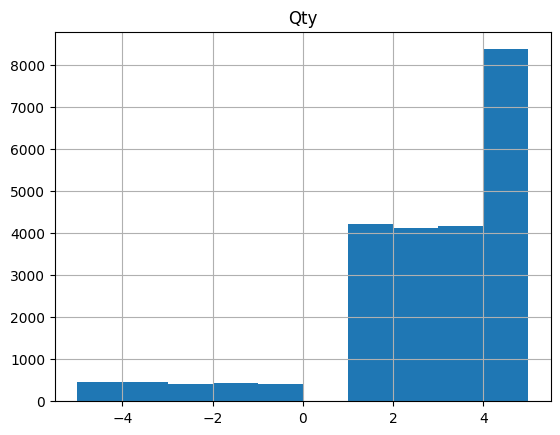

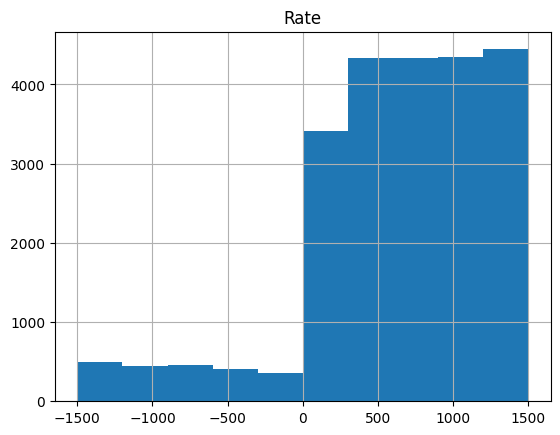

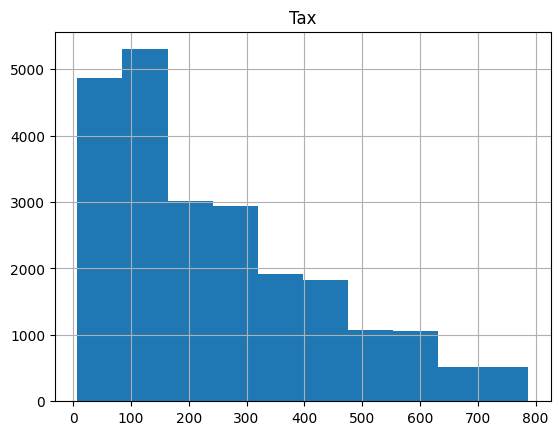

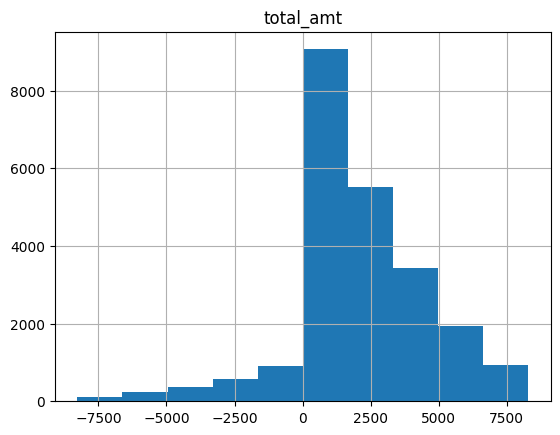

In [21]:
# Histograms for continuous veriables
for var in cust_final[cont_var]:
    cust_final.hist(column=var)

Frequency Bar Chart for transaction_id


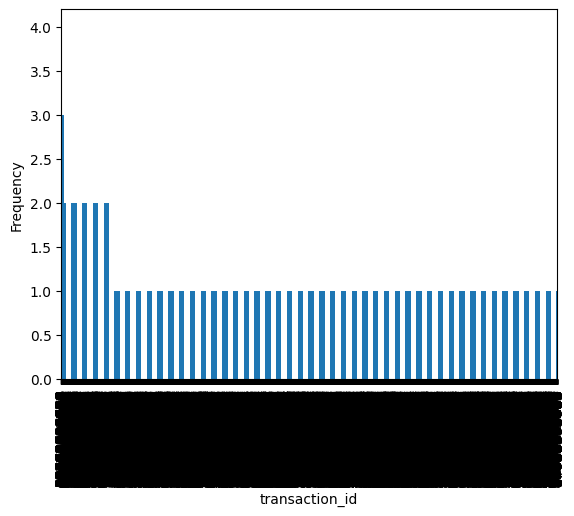

Frequency Bar Chart for cust_id


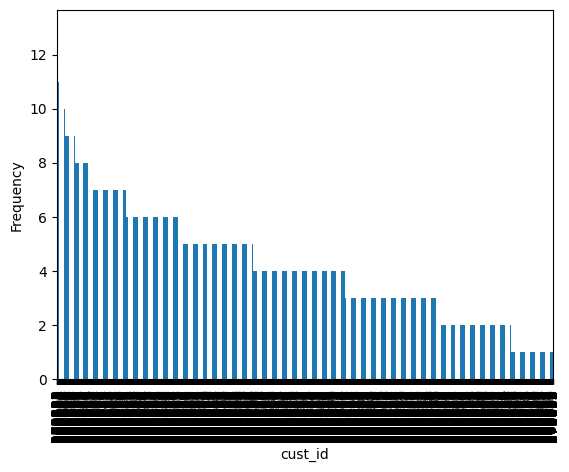

Frequency Bar Chart for tran_date


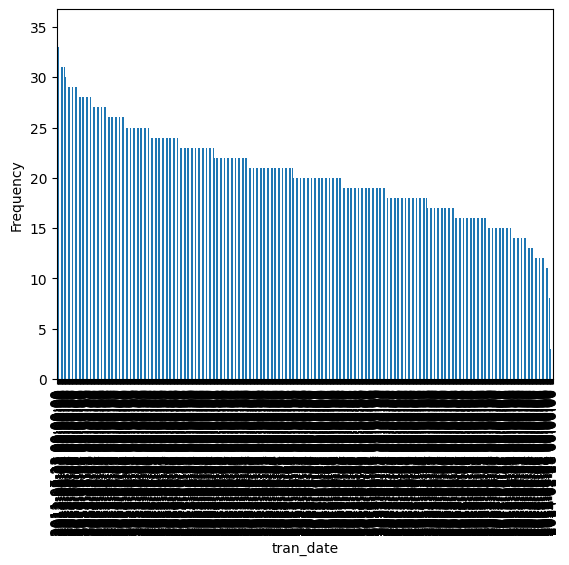

Frequency Bar Chart for Store_type


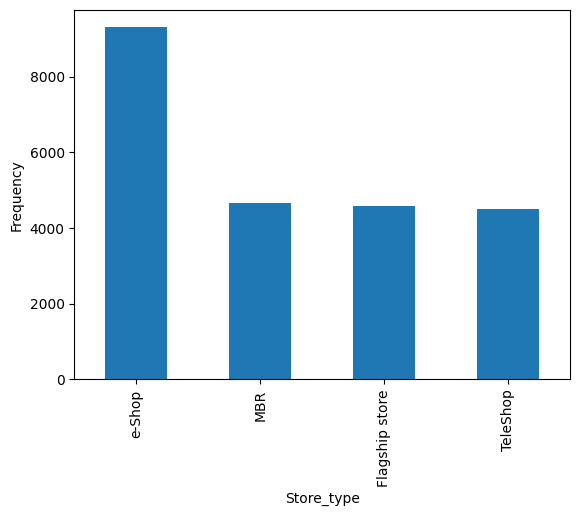

Frequency Bar Chart for DOB


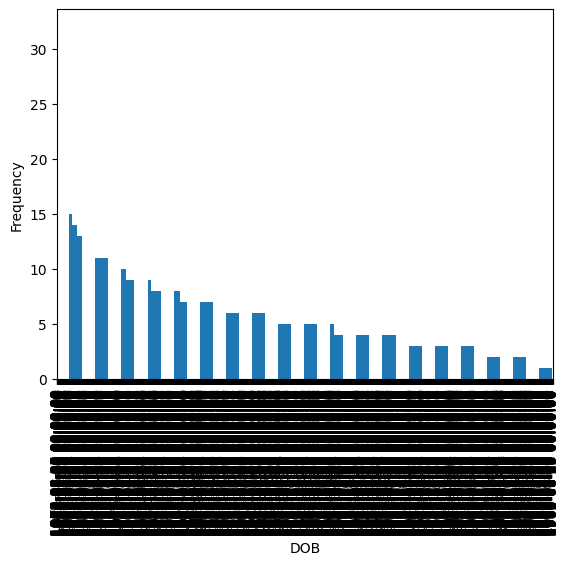

Frequency Bar Chart for Gender


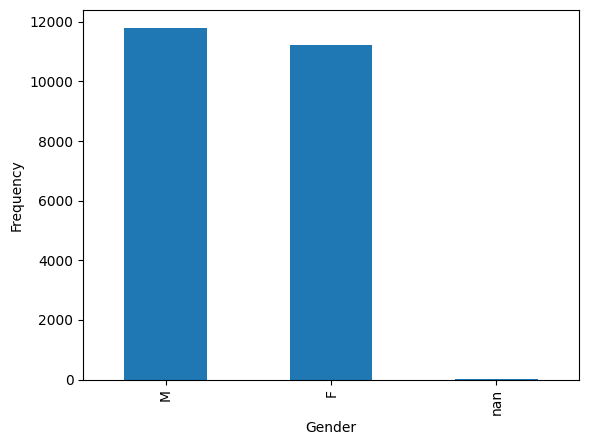

Frequency Bar Chart for city_code


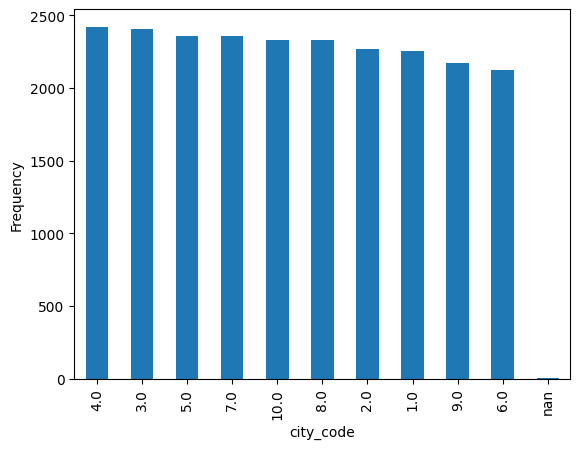

Frequency Bar Chart for prod_cat


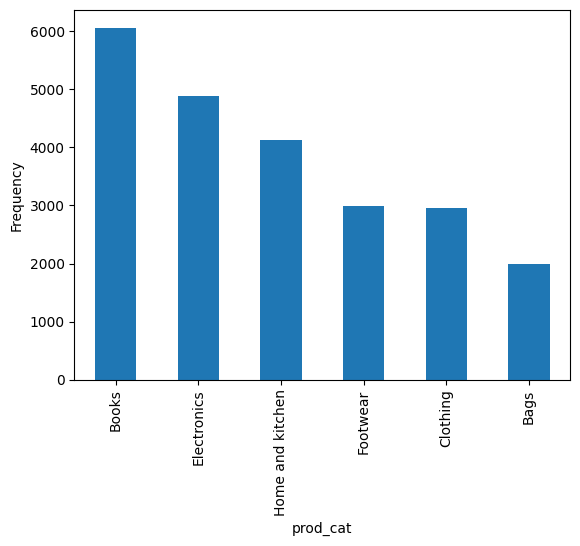

Frequency Bar Chart for prod_sub_cat_code


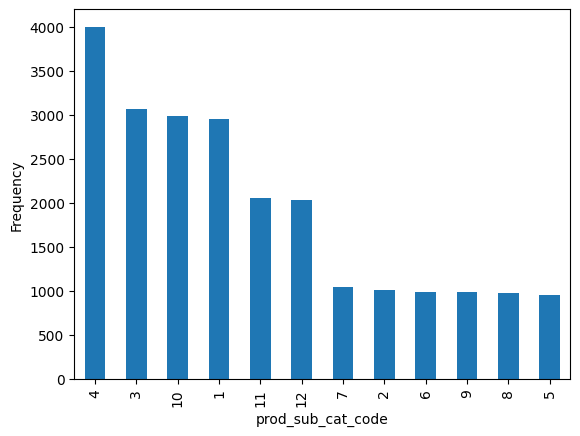

Frequency Bar Chart for prod_subcat


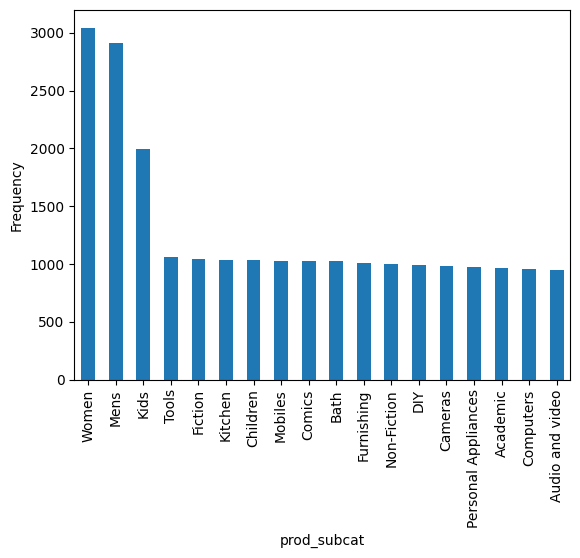

In [22]:
# Frequency bars for categorical veriables
for var in cat_var:
    frequency_table = cust_final[var].value_counts(dropna=False)
    frequency_table.plot.bar()
    plt.title(print("Frequency Bar Chart for",var))
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

### Calculate the following information using the merged dataset :

##### a. Time period of the available transaction data

In [23]:
print('Timeperiod of the available transaction data is between', cust_final.tran_date.min().date(), 'and', 
      cust_final.tran_date.max().date(),'. In days it would be',(cust_final.tran_date.max() - 
                                                                 cust_final.tran_date.min()).days,'days' )

Timeperiod of the available transaction data is between 2011-01-25 and 2014-02-28 . In days it would be 1130 days


##### b. Count of transactions where the total amount of transaction was negative

In [24]:
print('Count of transaction where total amount of transaction was negative: ',
      cust_final.total_amt[cust_final.total_amt <0].count())

Count of transaction where total amount of transaction was negative:  2164


### Analyze which product categories are more popular among females vs male customers.

In [25]:
## For this question will ignore null values as null is not asked


# Summerizing the table on Gender and prod_cat level
B = cust_final.groupby(by=['Gender', 'prod_cat'])['cust_id'].count().reset_index()

# Finding highest sales in any gender in categories
C = B.groupby(by='prod_cat')[['cust_id']].max()



pd.merge(C, B, on=['prod_cat','cust_id' ], how='left')

,prod_cat,cust_id,Gender
0,Bags,1004,M
1,Books,3116,M
2,Clothing,1518,M
3,Electronics,2567,M
4,Footwear,1528,F
5,Home and kitchen,2132,M


### Which City code has the maximum customers and what was the percentage of customers from that city?

In [26]:
## For this question null value is ignored as there are only 8 null values in city_code

print((cust.groupby(by='city_code')[['customer_Id']].count()/
 cust.shape[0]).sort_values(by='customer_Id', ascending=False).reset_index().head(1))


print('City code 3 has the highest customer count and 10.05366% of customers are from this city')

   city_code  customer_Id
0        3.0     0.105366
City code 3 has the highest customer count and 10.05366% of customers are from this city


### Which store type sells the maximum products by value and by quantity?

In [27]:
print(cust_final.groupby(by='Store_type')[['total_amt']].sum().reset_index().max())

print(cust_final.groupby(by='Store_type')[['Qty']].sum().reset_index().max())

print('Storetype "e-Shop" sells maximum products by value and quantity')

Store_type          e-Shop
total_amt     19842623.125
dtype: object
Store_type    e-Shop
Qty            22790
dtype: object
Storetype "e-Shop" sells maximum products by value and quantity


### What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [28]:
C  = cust_final.loc[(cust_final['prod_cat'].isin
                (['Clothing','Electronics'])) & (cust_final['Store_type'].isin
                                                 (['Flagship store']))]['total_amt']


print('Total amount earned from the "Electronics" and "Clothing" category in "Flagship Stores":',C.sum())

Total amount earned from the "Electronics" and "Clothing" category in "Flagship Stores": 3409559.27


### What was the total amount earned from "Male" customers under the "Electronics" category?

In [29]:
print('Total amount earned from "Male" customers under the "Electronics category": '
      ,cust_final.loc[(cust_final['Gender'].isin(['M'])) & 
                      (cust_final['prod_cat'].isin(['Electronics']))]['total_amt'].sum())

Total amount earned from "Male" customers under the "Electronics category":  5711351.62


## How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [30]:
D = cust_final.groupby(by=['transaction_id','cust_id'])[['total_amt']].sum().reset_index()


E = D.loc[D['total_amt'] >= 0]


F = E.groupby(by='cust_id')[['transaction_id']].count().reset_index()


print('Customers having more then 10 unique transactions, after removing all transactions which have any negative amount:',
      F[F['transaction_id'] > 10].shape[0])

Customers having more then 10 unique transactions, after removing all transactions which have any negative amount: 6


## For all customers aged between 25 - 35, find out:

In [31]:
cust_final_1 = cust_final[((pd.to_datetime(dt.datetime.today().
                                           date())-cust_final['DOB'])/pd.Timedelta(days=365.25) <=35) & 
                          ((pd.to_datetime(dt.datetime.today().date())-cust_final['DOB'])/pd.Timedelta
                           (days=365.25) >=25)]

### What was the total amount spent for “Electronics” and “Books” product categories?

In [32]:
G  = cust_final_1.loc[cust_final_1['prod_cat'].isin(['Electronics', 'Books'])]['total_amt']


print('Total amount spent for "Electronics" and "Books" :',G.sum())

Total amount spent for "Electronics" and "Books" : 4495579.79


### What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [33]:
 H = cust_final_1[(cust_final_1['tran_date'] >= pd.to_datetime(dt.date(year = 2014,month = 1,day = 1))) &
          (cust_final_1['tran_date'] <= pd.to_datetime(dt.date(year = 2014,month = 3,day = 1)))]['total_amt'].sum()
    
    
print('Total amount spent by these customers between 1st jan 2014 to 1st march 2014:',H)

Total amount spent by these customers between 1st jan 2014 to 1st march 2014: 507714.35
